In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import torch
import os

import sys
sys.path.insert(0, '../trainingdata')
from datasaver import *
sys.path.insert(0, '../testproblems/darcy')
from darcy_ms import *
sys.path.insert(0, '../ml')
from modelloader import loadmodelfromlabel
from NeuralOperator import NeuralOperator
from customlosses import *
from quadrature import *
from customlayers import discretize_functions
from basisfunctions import *

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
from NeuralOperator import NeuralOperator

logdir = '../../../nnlogs'
device = 'cuda:0'

sublogdir = 'modelNGO_ctheta'
modelNGO = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)
modelNGO_Neumann = loadmodelfromlabel(model=NeuralOperator, label='modelNGO_Neumann', logdir=logdir, sublogdir=sublogdir, device=device)
modelNGO_Neumann_tanhshrink = loadmodelfromlabel(model=NeuralOperator, label='modelNGO_Neumann_tanhshrink', logdir=logdir, sublogdir=sublogdir, device=device)
FEM = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)
FEM.hparams['modeltype'] = 'FEM'
FEM.hparams['dtype'] = torch.float64
FEM.hparams['precision'] = 64
FEM.hparams['Neumannseries'] = False
projection = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)
projection.hparams['modeltype'] = 'projection'
projection.hparams['dtype'] = torch.float64
projection.hparams['precision'] = 64

# modeldict = {'Projection': projection,
#              'FEM': FEM,
#             'Model NGO': modelNGO,
#            # 'Neumann Model NGO': modelNGO_Neumann,
#             'Neumann Model NGO': modelNGO_Neumann_tanhshrink}

model = FEM

/data/storage8/prins/prins/phd/git/ngo-pde-gk/analysisnotebooks/../testproblems/darcy/NeuralOperator.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  A_0 = torch.tensor(A_0, dtype=self.hparams['dtype'], device=self.used_device)


0
0


/data/storage8/prins/prins/phd/git/ngo-pde-gk/analysisnotebooks/../testproblems/darcy/NeuralOperator.py:249: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  F = torch.tensor(self.compute_F(theta_d, theta_g_d), dtype=self.hparams['dtype'], device=self.used_device)


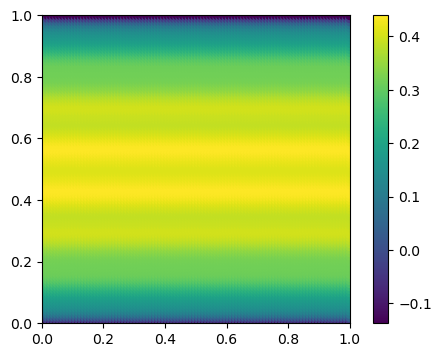

In [152]:
N_samples = 1

alpha = 0.05
q_low = alpha/2
q_high = 1 - q_low

size_title = 20
size_ticklabels = 15
size_axeslabels = 20

quadrature = UniformQuadrature2D(Q=101)
grid = torch.tensor(quadrature.xi_Omega)
plane = 1/2*torch.ones(grid.shape)
x = plane
xp = plane
x[:,0] = grid[:,0]
xp[:,0] = grid[:,1]

linestyles=['-','-','--','--','--','--', '--','--','--','--','--','--']
colors = ['black','grey','C0','C1','C2','C3','C4','C0','C1','C2','C3','C4']
# markers = ['o','^','o','^','o','^','o']

dataset = ManufacturedSolutionsSetDarcy_ctheta(N_samples=N_samples, variables=['x','x'], l_min=[1,1], l_max=[1,1], c_theta_min=0, c_theta_max=0, device=device)
theta = dataset.theta
f = dataset.f
etat = dataset.etat
etab = dataset.etab
gl = dataset.gl
gr = dataset.gr
u = dataset.u

G_hat = model.Greens_function(theta,x,xp).detach().cpu().numpy()

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

# fig = ax.tripcolor(tx[:,1], tx[:,2], variable_d[0])

fig = ax.scatter(grid[:,0].detach().cpu().numpy(), grid[:,1].detach().cpu().numpy(), c=G_hat[0])

ax.ticklabel_format(style='sci', scilimits=[-3,3])
# ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
# ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

plt.show()

In [97]:
x[x[:,1]==1/2,0]

tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
        0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
        0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
        0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
        0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
        0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
        0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
        0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
        0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
        0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
        0.9900, 1.0000], dtype=torch.float64)